<h1 style='font-size:30px; text-align:center'>Restaurant Revenue Prediction System</h1>

### Exploratory and Diagnostic analysis of restaurant_revenue data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train_data = pd.read_csv('train.csv',index_col=0)
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [3]:
test_data = pd.read_csv('test.csv',index_col=0)
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape  # Less no of rows in train data compare to test data

(137, 42)

In [5]:
test_data.shape

(100000, 41)

In [6]:
train_data['City'].nunique()

34

In [7]:
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [8]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


<AxesSubplot:>

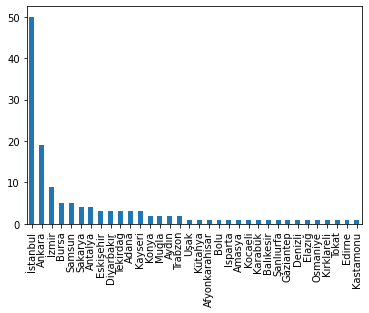

In [9]:
train_data['City'].value_counts().plot.bar()

<AxesSubplot:>

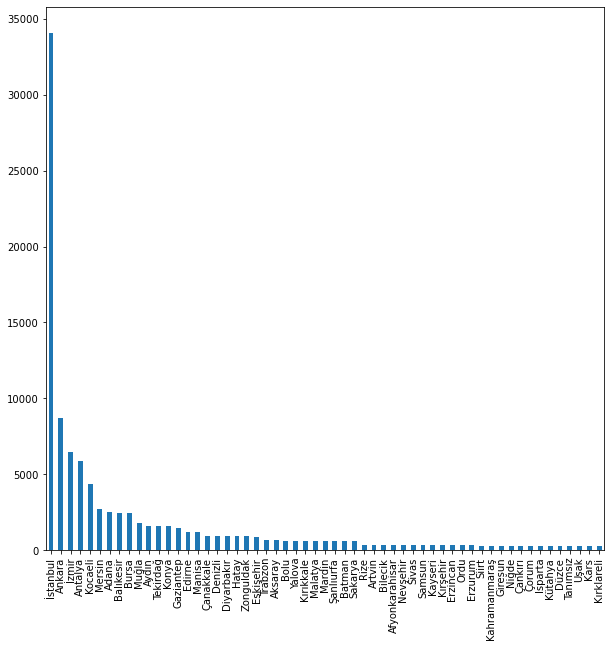

In [10]:
plt.figure(figsize=(10,10))
test_data['City'].value_counts().plot.bar() 

<AxesSubplot:>

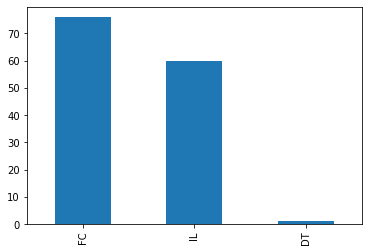

In [11]:
train_data['Type'].value_counts().plot.bar()

<AxesSubplot:>

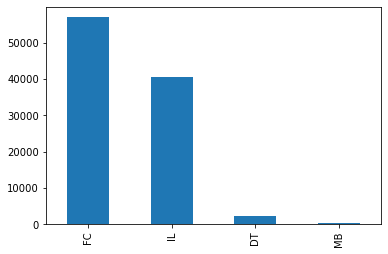

In [12]:
test_data['Type'].value_counts().plot.bar()

<AxesSubplot:>

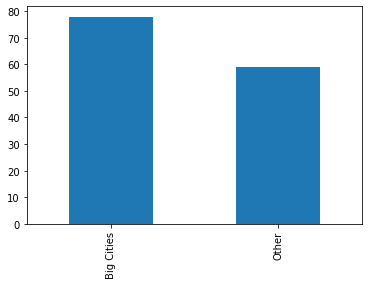

In [13]:
train_data['City Group'].value_counts().plot.bar()

<AxesSubplot:>

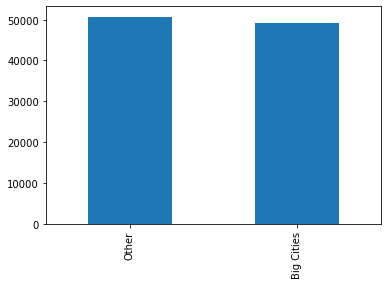

In [14]:
test_data['City Group'].value_counts().plot.bar()

In [15]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Type'])],axis=1)
train_data = pd.concat([train_data,pd.get_dummies(train_data['Type'])],axis=1)
test_data.drop('Type',axis=1,inplace=True)
train_data.drop('Type',axis=1,inplace=True)

In [16]:
test_data.head()

,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,P7,...,P32,P33,P34,P35,P36,P37,DT,FC,IL,MB
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,1,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,1,0,0
1,03/18/2011,Konya,Other,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,0,1,0
2,10/30/2013,Ankara,Big Cities,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,1,0,0
3,05/06/2013,Kocaeli,Other,2,4.0,4.0,4.0,2,3,5,...,0,0,0,0,0,0,0,0,1,0
4,07/31/2013,Afyonkarahisar,Other,2,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,1,0,0


In [17]:
train_data.head()

,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,P7,...,P32,P33,P34,P35,P36,P37,revenue,DT,FC,IL
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,4,5.0,4.0,4.0,2,2,5,...,4,5,5,4,3,4,5653753.0,0,0,1
1,02/14/2008,Ankara,Big Cities,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,6923131.0,0,1,0
2,03/09/2013,Diyarbakır,Other,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,2055379.0,0,0,1
3,02/02/2012,Tokat,Other,6,4.5,6.0,6.0,4,4,10,...,10,6,18,12,12,6,2675511.0,0,0,1
4,05/09/2009,Gaziantep,Other,3,4.0,3.0,4.0,2,2,5,...,3,2,3,4,3,3,4316715.0,0,0,1


In [18]:
test_data.drop('MB',axis=1,inplace=True)

In [19]:
test_data.head()

,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,DT,FC,IL
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,1,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,1,0
1,03/18/2011,Konya,Other,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,0,0,1
2,10/30/2013,Ankara,Big Cities,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,0,1,0
3,05/06/2013,Kocaeli,Other,2,4.0,4.0,4.0,2,3,5,...,4,0,0,0,0,0,0,0,0,1
4,07/31/2013,Afyonkarahisar,Other,2,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,1,0


In [20]:
test_data['New City Group'] = pd.get_dummies(test_data['City Group'],drop_first=True)
train_data['New City Group'] = pd.get_dummies(train_data['City Group'],drop_first=True)
test_data.drop('City Group',axis=1,inplace=True)
train_data.drop('City Group',axis=1,inplace=True)

In [21]:
test_data.head()

,Open Date,City,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,DT,FC,IL,New City Group
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,1,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,1,0,1
1,03/18/2011,Konya,3,4.0,4.0,4.0,2,2,5,3,...,0,0,0,0,0,0,0,0,1,1
2,10/30/2013,Ankara,3,4.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,0,0,1,0,0
3,05/06/2013,Kocaeli,2,4.0,4.0,4.0,2,3,5,4,...,0,0,0,0,0,0,0,0,1,1
4,07/31/2013,Afyonkarahisar,2,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,1,0,1


In [22]:
train_data.head()

,Open Date,City,P1,P2,P3,P4,P5,P6,P7,P8,...,P33,P34,P35,P36,P37,revenue,DT,FC,IL,New City Group
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,4,5.0,4.0,4.0,2,2,5,4,...,5,5,4,3,4,5653753.0,0,0,1,0
1,02/14/2008,Ankara,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,6923131.0,0,1,0,0
2,03/09/2013,Diyarbakır,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,2055379.0,0,0,1,1
3,02/02/2012,Tokat,6,4.5,6.0,6.0,4,4,10,8,...,6,18,12,12,6,2675511.0,0,0,1,1
4,05/09/2009,Gaziantep,3,4.0,3.0,4.0,2,2,5,5,...,2,3,4,3,3,4316715.0,0,0,1,1


In [23]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['City'])],axis=1)
train_data = pd.concat([train_data,pd.get_dummies(train_data['City'])],axis=1)
test_data.drop('City',axis=1,inplace=True)
train_data.drop('City',axis=1,inplace=True)

In [24]:
test_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Trabzon,Uşak,Yalova,Zonguldak,Çanakkale,Çankırı,Çorum,İstanbul,İzmir,Şanlıurfa
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,1,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,0,0,0,0
1,03/18/2011,3,4.0,4.0,4.0,2,2,5,3,4,...,0,0,0,0,0,0,0,0,0,0
2,10/30/2013,3,4.0,4.0,4.0,2,2,5,4,4,...,0,0,0,0,0,0,0,0,0,0
3,05/06/2013,2,4.0,4.0,4.0,2,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
4,07/31/2013,2,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,0,0,0,0


In [25]:
train_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Osmaniye,Sakarya,Samsun,Tekirdağ,Tokat,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,4,5.0,4.0,4.0,2,2,5,4,5,...,0,0,0,0,0,0,0,1,0,0
1,02/14/2008,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0
2,03/09/2013,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0
3,02/02/2012,6,4.5,6.0,6.0,4,4,10,8,10,...,0,0,0,0,1,0,0,0,0,0
4,05/09/2009,3,4.0,3.0,4.0,2,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test_data.columns # 99

Index(['Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'DT', 'FC',
       'IL', 'New City Group', 'Adana', 'Afyonkarahisar', 'Aksaray', 'Ankara',
       'Antalya', 'Artvin', 'Aydın', 'Balıkesir', 'Batman', 'Bilecik', 'Bolu',
       'Bursa', 'Denizli', 'Diyarbakır', 'Düzce', 'Edirne', 'Erzincan',
       'Erzurum', 'Eskişehir', 'Gaziantep', 'Giresun', 'Hatay', 'Isparta',
       'Kahramanmaraş', 'Kars', 'Kayseri', 'Kocaeli', 'Konya', 'Kütahya',
       'Kırklareli', 'Kırıkkale', 'Kırşehir', 'Malatya', 'Manisa', 'Mardin',
       'Mersin', 'Muğla', 'Nevşehir', 'Niğde', 'Ordu', 'Rize', 'Sakarya',
       'Samsun', 'Siirt', 'Sivas', 'Tanımsız', 'Tekirdağ', 'Trabzon', 'Uşak',
       'Yalova', 'Zonguldak', 'Çanakkale', 'Çankırı', 'Çorum', 'İstanbul',
       'İzmir'

In [27]:
train_data.columns  # 77

Index(['Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'DT',
       'FC', 'IL', 'New City Group', 'Adana', 'Afyonkarahisar', 'Amasya',
       'Ankara', 'Antalya', 'Aydın', 'Balıkesir', 'Bolu', 'Bursa', 'Denizli',
       'Diyarbakır', 'Edirne', 'Elazığ', 'Eskişehir', 'Gaziantep', 'Isparta',
       'Karabük', 'Kastamonu', 'Kayseri', 'Kocaeli', 'Konya', 'Kütahya',
       'Kırklareli', 'Muğla', 'Osmaniye', 'Sakarya', 'Samsun', 'Tekirdağ',
       'Tokat', 'Trabzon', 'Uşak', 'İstanbul', 'İzmir', 'Şanlıurfa'],
      dtype='object')

In [28]:
for i in test_data.columns:
    if( (i not in train_data.columns) and (i != 'revenue')):
        test_data.drop(i,axis=1,inplace=True)

In [29]:
test_data.columns # 70

Index(['Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'DT', 'FC',
       'IL', 'New City Group', 'Adana', 'Afyonkarahisar', 'Ankara', 'Antalya',
       'Aydın', 'Balıkesir', 'Bolu', 'Bursa', 'Denizli', 'Diyarbakır',
       'Edirne', 'Eskişehir', 'Gaziantep', 'Isparta', 'Kayseri', 'Kocaeli',
       'Konya', 'Kütahya', 'Kırklareli', 'Muğla', 'Sakarya', 'Samsun',
       'Tekirdağ', 'Trabzon', 'Uşak', 'İstanbul', 'İzmir', 'Şanlıurfa'],
      dtype='object')

In [30]:
train_data.columns  # 77

Index(['Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'DT',
       'FC', 'IL', 'New City Group', 'Adana', 'Afyonkarahisar', 'Amasya',
       'Ankara', 'Antalya', 'Aydın', 'Balıkesir', 'Bolu', 'Bursa', 'Denizli',
       'Diyarbakır', 'Edirne', 'Elazığ', 'Eskişehir', 'Gaziantep', 'Isparta',
       'Karabük', 'Kastamonu', 'Kayseri', 'Kocaeli', 'Konya', 'Kütahya',
       'Kırklareli', 'Muğla', 'Osmaniye', 'Sakarya', 'Samsun', 'Tekirdağ',
       'Tokat', 'Trabzon', 'Uşak', 'İstanbul', 'İzmir', 'Şanlıurfa'],
      dtype='object')

In [31]:
for i in train_data.columns:
    if( (i not in test_data.columns) and (i != 'revenue')):
        train_data.drop(i,axis=1,inplace=True)

In [32]:
len(train_data.columns)

71

In [33]:
len(test_data.columns)

70

In [34]:
train_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Kırklareli,Muğla,Sakarya,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,4,5.0,4.0,4.0,2,2,5,4,5,...,0,0,0,0,0,0,0,1,0,0
1,02/14/2008,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0
2,03/09/2013,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0
3,02/02/2012,6,4.5,6.0,6.0,4,4,10,8,10,...,0,0,0,0,0,0,0,0,0,0
4,05/09/2009,3,4.0,3.0,4.0,2,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train_data['Open Date'][0].split('/')

['07', '17', '1999']

In [36]:
train_data['Date'] = train_data['Open Date'].apply(lambda x: int(x.split('/')[0]))

In [37]:
train_data['Month'] = train_data['Open Date'].apply(lambda x: int(x.split('/')[1]))

In [38]:
train_data['Year'] = train_data['Open Date'].apply(lambda x: int(x.split('/')[2]))

In [39]:
train_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Date,Month,Year
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,4,5.0,4.0,4.0,2,2,5,4,5,...,0,0,0,0,1,0,0,7,17,1999
1,02/14/2008,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,2,14,2008
2,03/09/2013,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,3,9,2013
3,02/02/2012,6,4.5,6.0,6.0,4,4,10,8,10,...,0,0,0,0,0,0,0,2,2,2012
4,05/09/2009,3,4.0,3.0,4.0,2,2,5,5,5,...,0,0,0,0,0,0,0,5,9,2009


In [40]:
test_data['Date'] = test_data['Open Date'].apply(lambda x: int(x.split('/')[0]))

In [41]:
test_data['Month'] = test_data['Open Date'].apply(lambda x: int(x.split('/')[1]))

In [42]:
test_data['Year'] = test_data['Open Date'].apply(lambda x: int(x.split('/')[2]))

In [43]:
test_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Date,Month,Year
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,1,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,0,1,22,2011
1,03/18/2011,3,4.0,4.0,4.0,2,2,5,3,4,...,0,0,0,0,0,0,0,3,18,2011
2,10/30/2013,3,4.0,4.0,4.0,2,2,5,4,4,...,0,0,0,0,0,0,0,10,30,2013
3,05/06/2013,2,4.0,4.0,4.0,2,3,5,4,5,...,0,0,0,0,0,0,0,5,6,2013
4,07/31/2013,2,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,0,7,31,2013


In [44]:
train_data.drop('Open Date',axis=1,inplace=True)
test_data.drop('Open Date',axis=1,inplace=True)

In [45]:
train_data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Date,Month,Year
Id,,,,,,,,,,,,,,,,,,,,,
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,0,0,0,0,1,0,0,7,17,1999
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,2,14,2008
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,3,9,2013
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,0,0,0,0,0,0,0,2,2,2012
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,0,0,0,0,0,0,0,5,9,2009


In [46]:
test_data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Date,Month,Year
Id,,,,,,,,,,,,,,,,,,,,,
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,0,0,0,0,0,0,0,1,22,2011
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,0,0,0,0,0,0,0,3,18,2011
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,0,0,0,0,0,0,0,10,30,2013
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,0,0,0,0,0,0,0,5,6,2013
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,0,0,0,0,0,0,0,7,31,2013


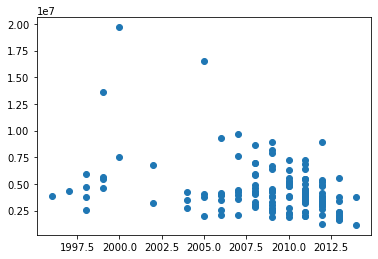

In [47]:
plt.scatter(train_data['Year'],train_data['revenue'])

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


C:\Users\Khushbu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


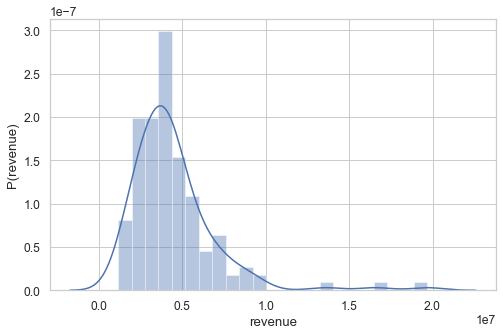

In [48]:
import seaborn as sns
print(train_data['revenue'].describe())
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train_data['revenue'], norm_hist=False, kde=True
).set(xlabel='revenue', ylabel='P(revenue)');

### Analysing the effect of 'P' values on 'revenue' using heatmap

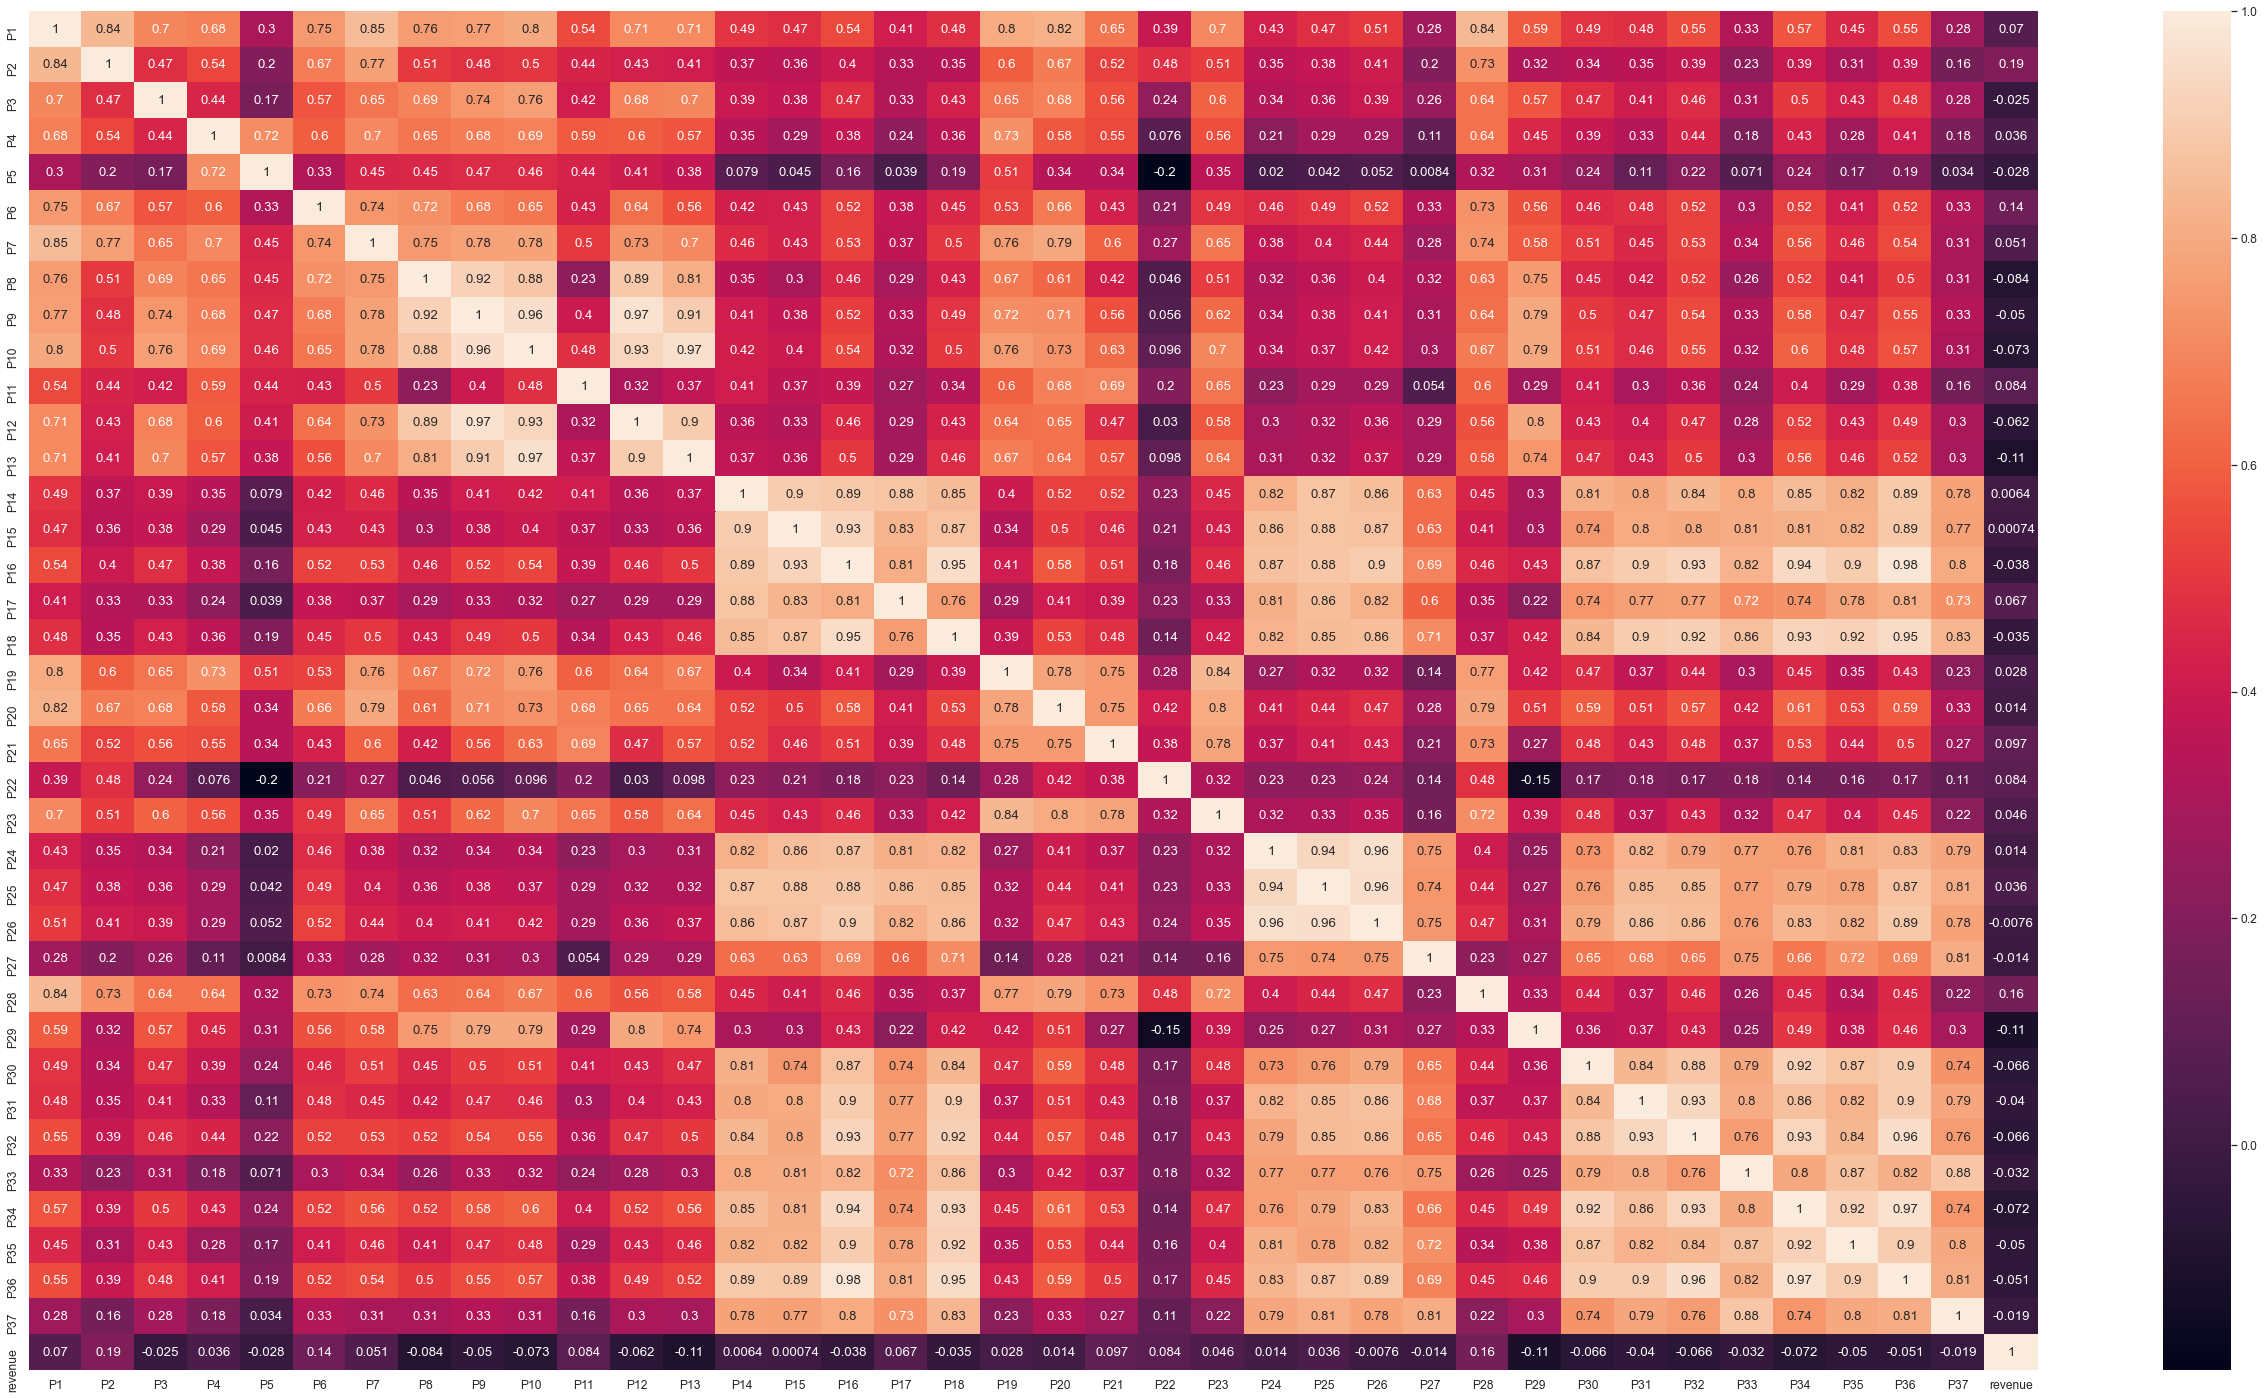

In [49]:
import seaborn as sns
df = train_data[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37','revenue']]
corrMatrix = df.corr()
plt.figure(figsize=(45,25))
sns.heatmap(corrMatrix, annot=True)
plt.show()

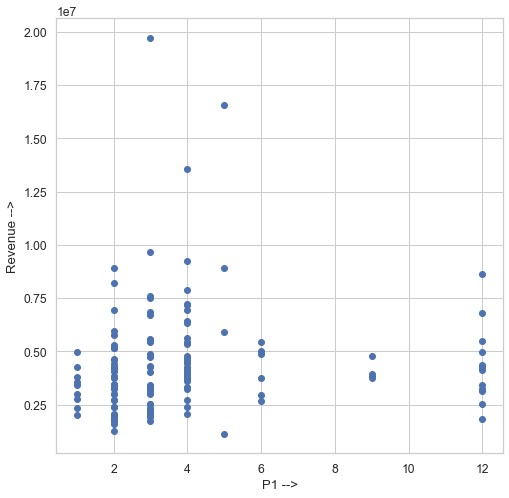

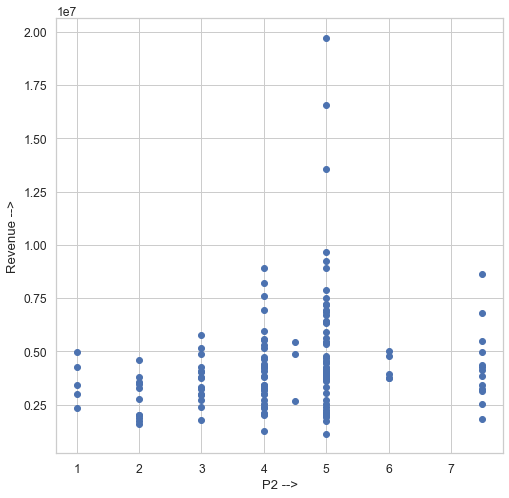

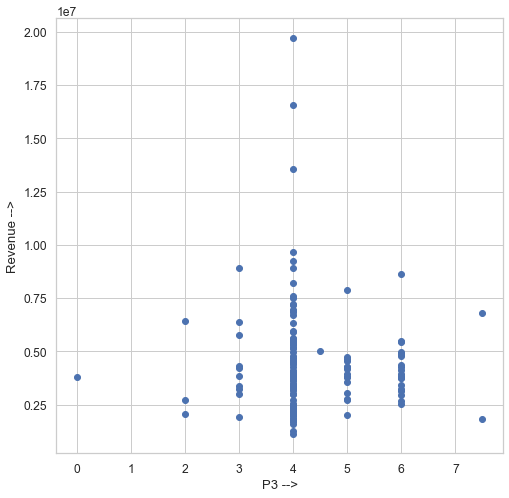

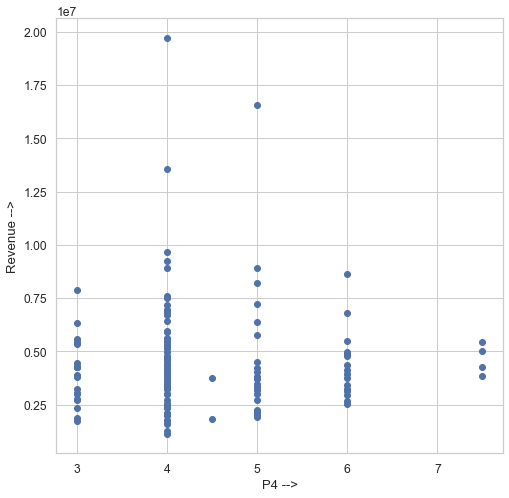

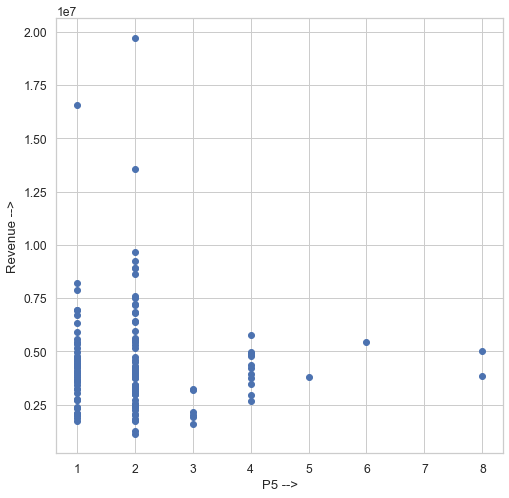

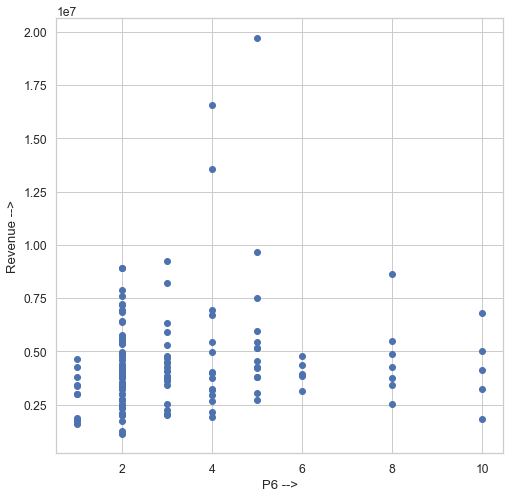

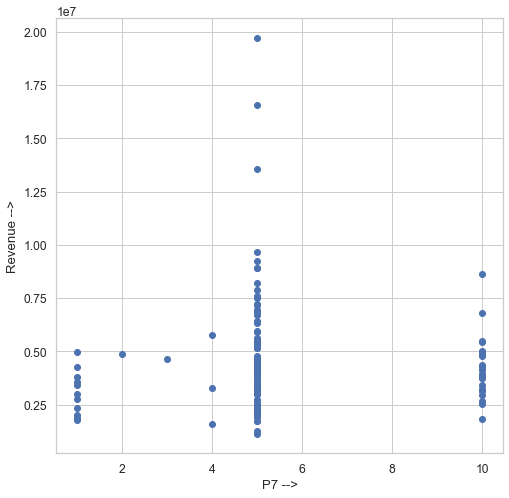

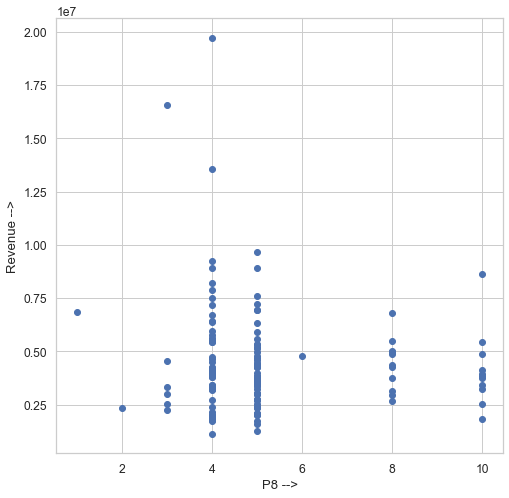

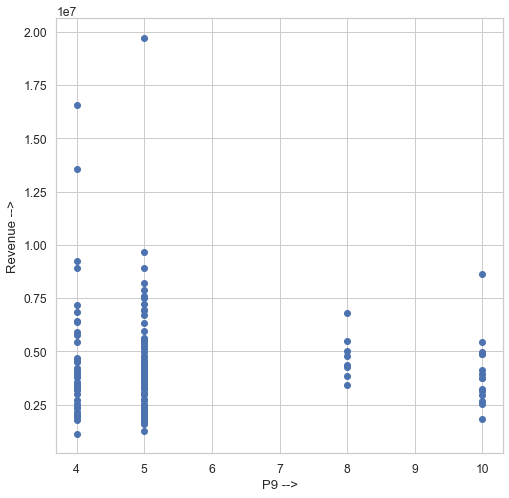

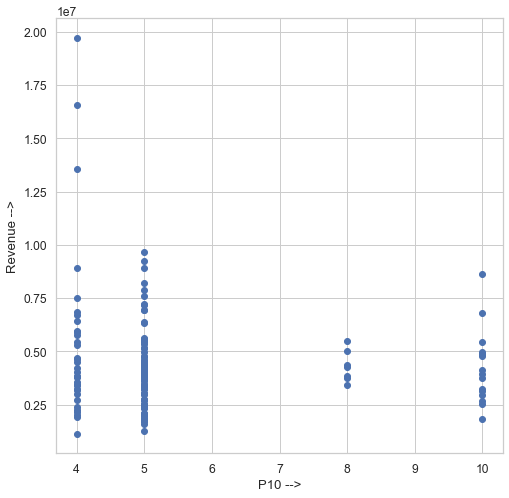

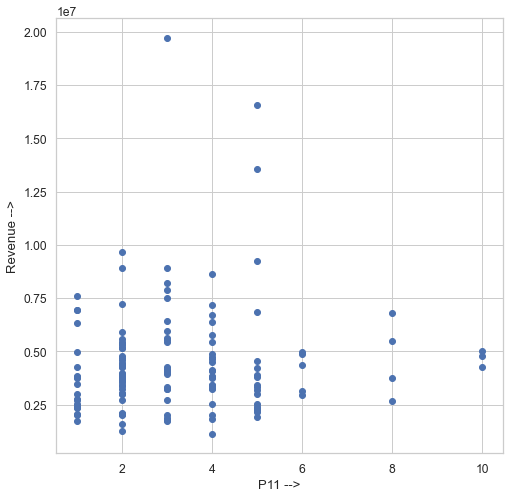

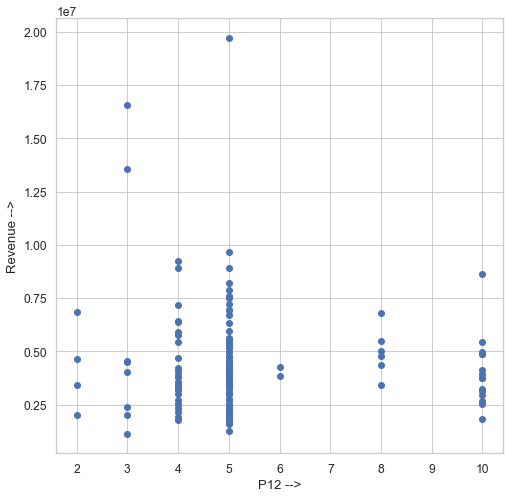

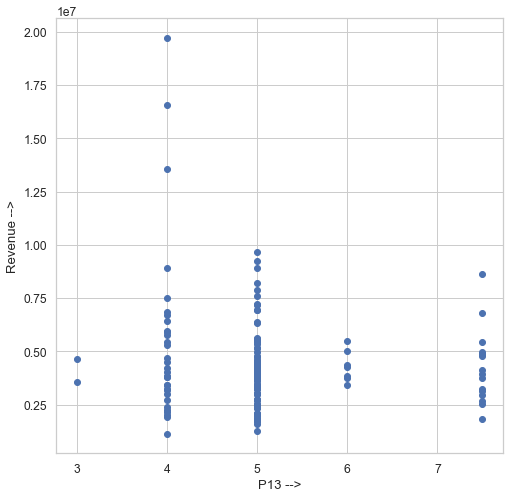

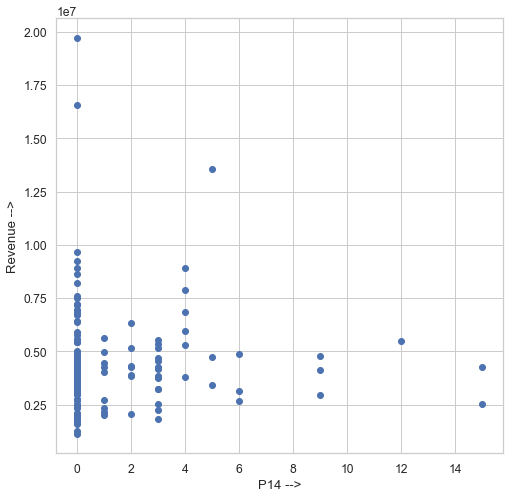

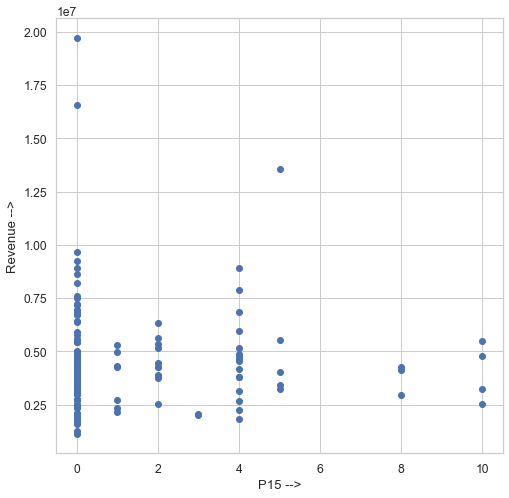

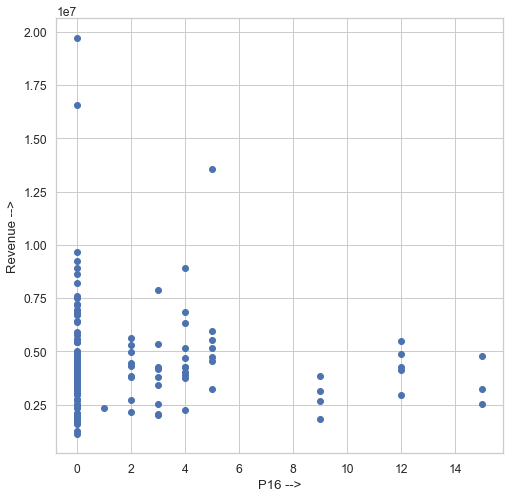

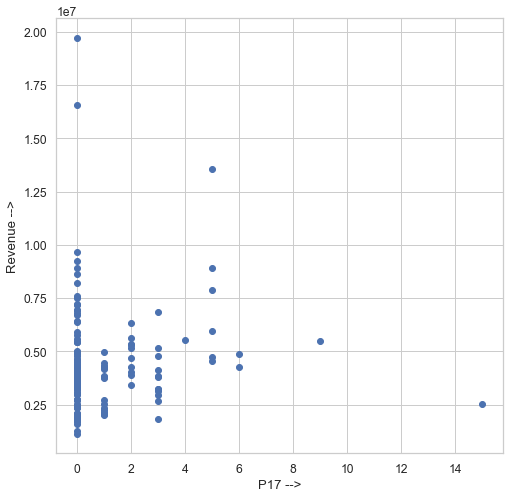

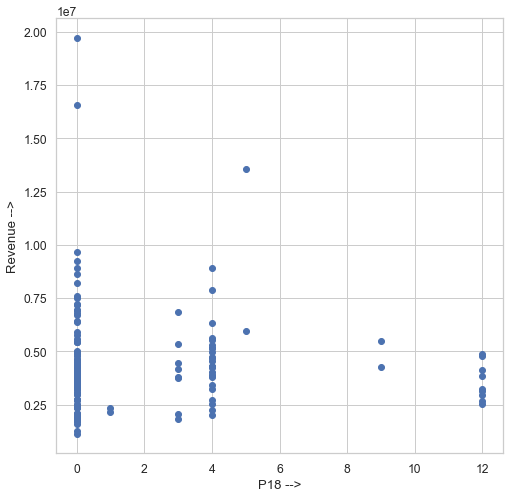

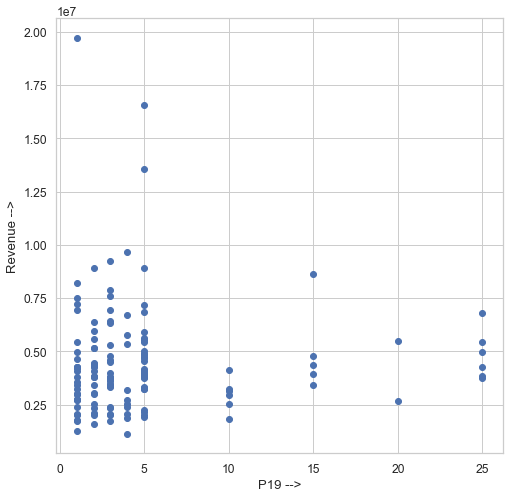

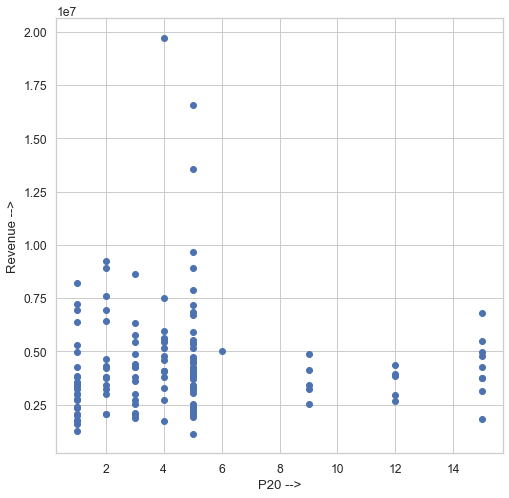

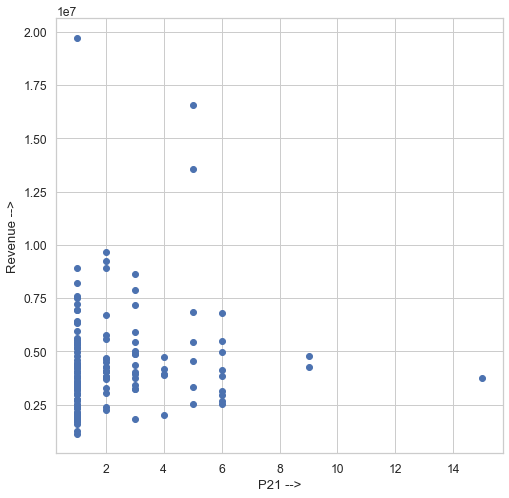

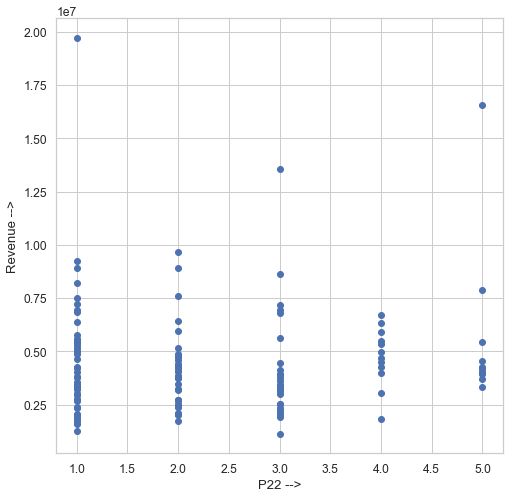

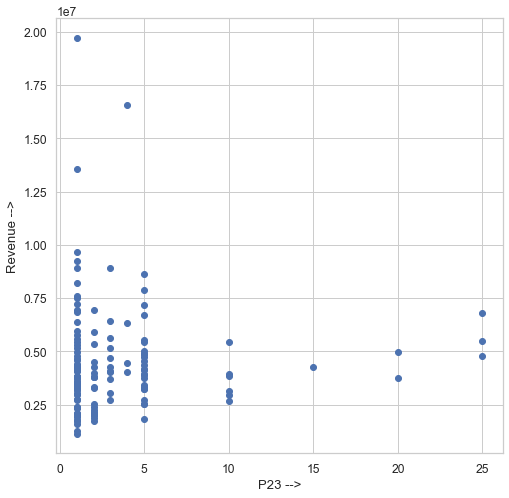

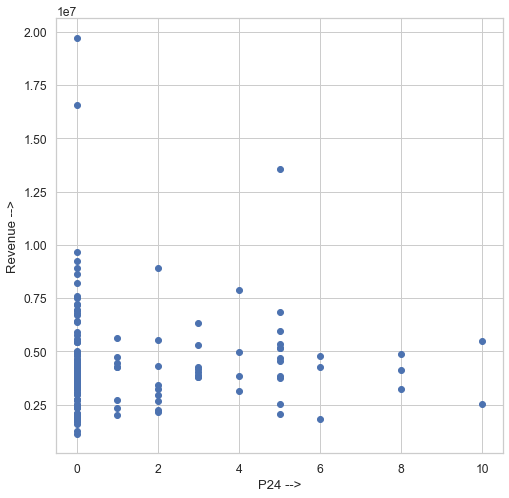

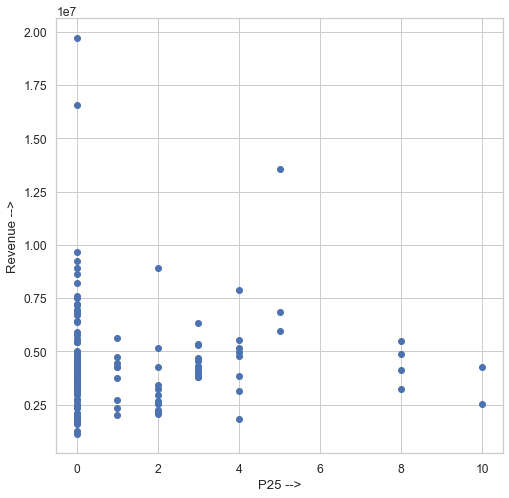

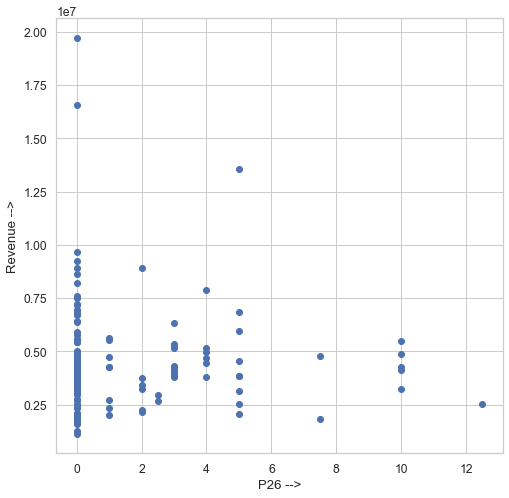

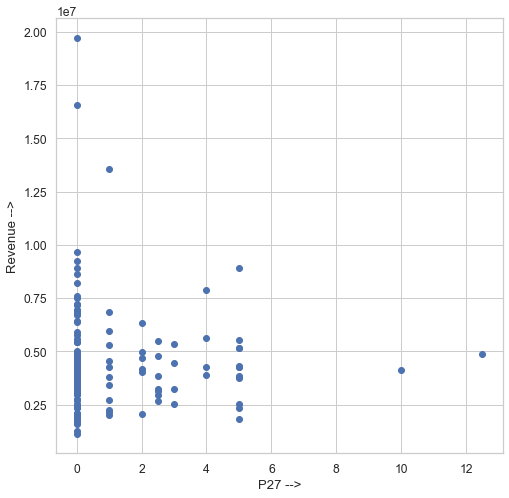

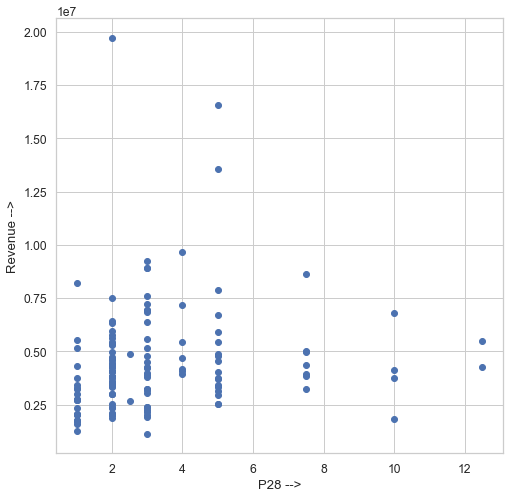

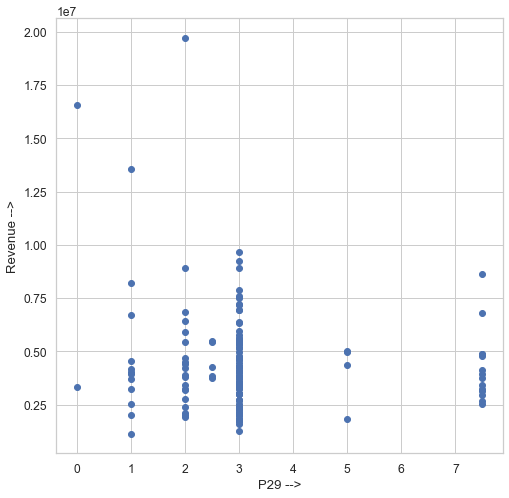

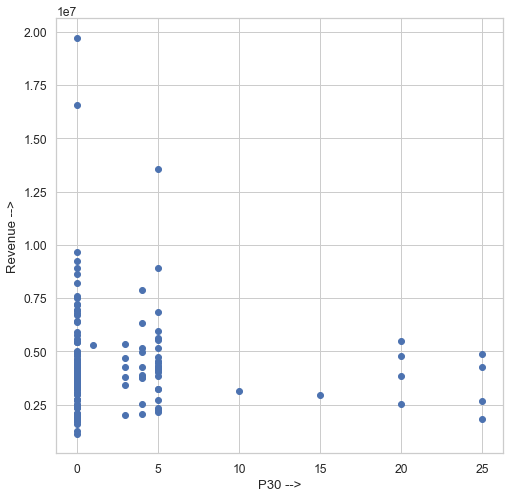

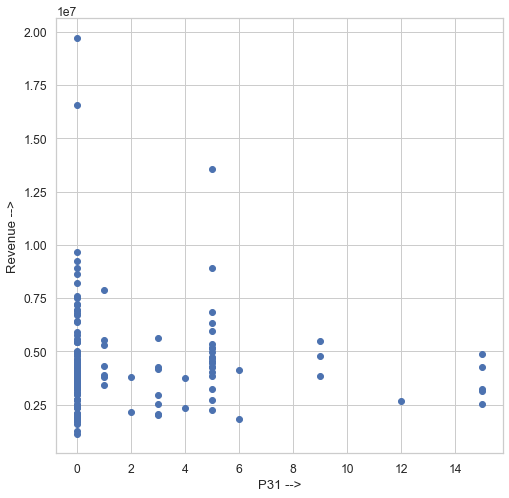

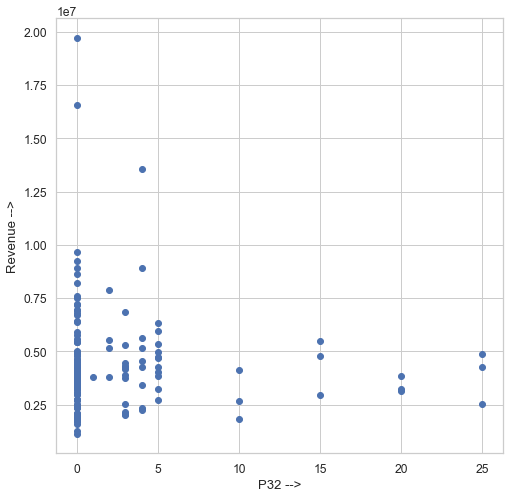

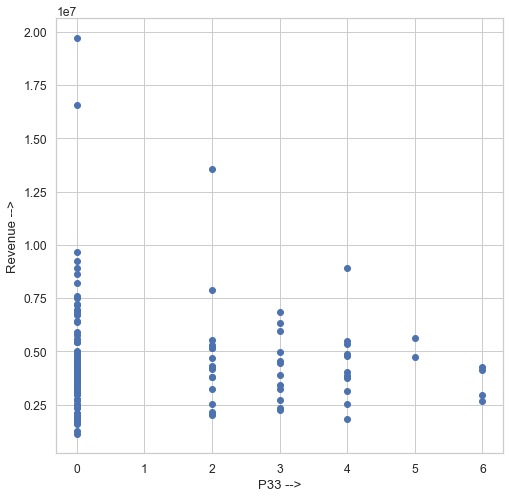

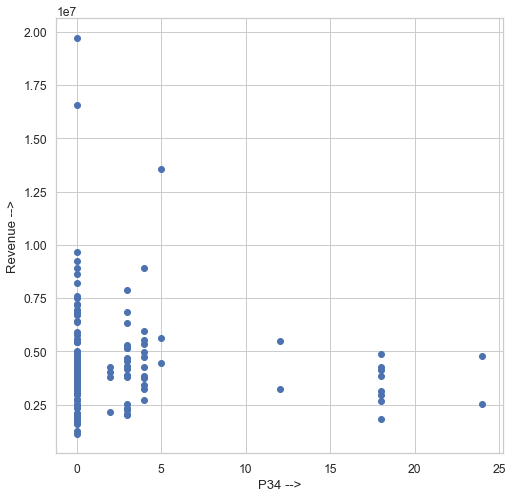

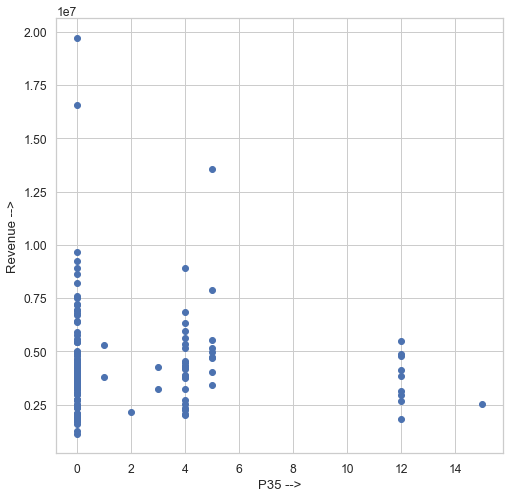

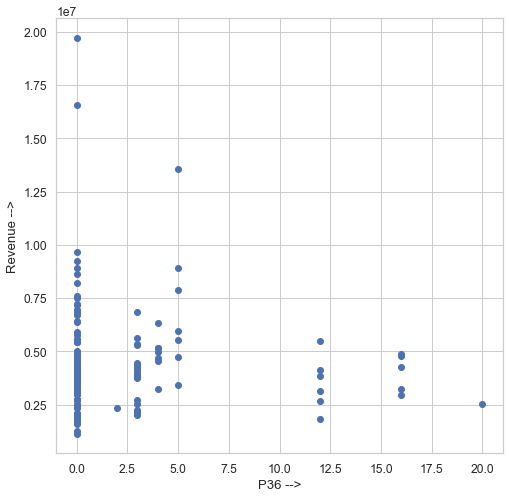

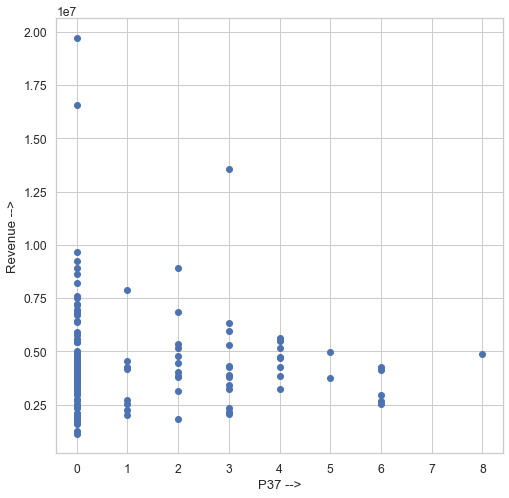

In [50]:
for i in ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37']:
    plt.figure(figsize=(8,8))
    plt.scatter(train_data[i],train_data['revenue'])
    plt.xlabel('{} -->'.format(i))
    plt.ylabel('Revenue -->')
    plt.show()

In [51]:
features = train_data.drop('revenue',axis=1)

In [52]:
features.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Date,Month,Year
Id,,,,,,,,,,,,,,,,,,,,,
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,0,0,0,0,1,0,0,7,17,1999
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,2,14,2008
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,3,9,2013
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,0,0,0,0,0,0,0,2,2,2012
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,0,0,0,0,0,0,0,5,9,2009


In [53]:
labels = train_data['revenue']
labels

Id
0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

In [56]:
model.fit(features,labels)

LinearRegression()

In [57]:
model.coef_

array([  510116.11770966,  -128508.09954843,  -203655.6365805 ,
          15501.3710445 ,   266630.35863315,   513371.14279499,
        -188825.50031366, -1391011.09305136,  2314949.9200425 ,
       -2400364.5432275 ,  -197097.32593256,  -200525.02099869,
        1154316.86775241,  -450813.67376316,   416063.07064199,
       -1120321.79963218,   213155.51120782,   513391.18629996,
        -178089.10212697,  -350089.70597586,   745849.03309413,
        -351253.31080841,   102474.18420723,  1391237.02880416,
         573963.12974315, -2226925.44991265,    22979.74519135,
         671599.83598252,   179990.16015546,   172552.3675853 ,
         175444.13282586,   -68214.48257277,  -636692.26180486,
         239391.46474103,  -127653.73378334,   385466.13368643,
         259846.60744678, -2079652.92905751,  1467581.98413946,
         612070.94491811,  -765291.9824242 ,  4975963.06607108,
          11657.1095343 , -1539309.92673118,   186777.54578341,
         243043.26732493,  2886674.98822

In [58]:
pd.DataFrame(model.coef_,columns=['Coef'],index= features.columns).sort_values(by='Coef',ascending=False)[0:20]

,Coef
Edirne,6.209752e+06
Adana,4.975963e+06
Gaziantep,3.559289e+06
Balıkesir,2.886675e+06
Trabzon,2.485181e+06
P9,2.314950e+06
Muğla,2.269306e+06
Tekirdağ,2.268149e+06
İzmir,1.522505e+06
FC,1.467582e+06


In [59]:
print('Model Score: ' + str(round(model.score(features,labels)*100,2)))

Model Score: 51.29


<AxesSubplot:>

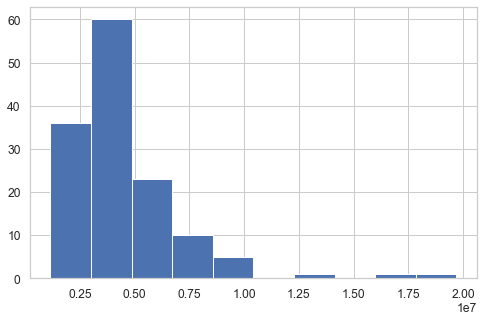

In [60]:
train_data['revenue'].hist()

In [61]:
train_data[train_data['revenue']>10000000]

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Date,Month,Year
Id,,,,,,,,,,,,,,,,,,,,,
16,3,5.0,4.0,4.0,2,5,5,4,5,4,...,0,0,0,0,1,0,0,1,7,2000
75,5,5.0,4.0,5.0,1,4,5,3,4,4,...,0,0,0,0,1,0,0,10,15,2005
99,4,5.0,4.0,4.0,2,4,5,4,4,4,...,0,0,0,0,1,0,0,12,18,1999


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [63]:
from sklearn.tree import DecisionTreeRegressor
X = train_data.drop('revenue',axis=1)
y = train_data['revenue']
tree = DecisionTreeRegressor().fit(X, y)

In [64]:
import numpy as np
d = {'Importance': np.round(tree.feature_importances_, 3) , 'Features': X.columns}
feature_imp = pd.DataFrame(data=d)
feature_imp

,Importance,Features
0,0.041,P1
1,0.020,P2
2,0.002,P3
3,0.000,P4
4,0.001,P5
...,...,...
67,0.000,İzmir
68,0.000,Şanlıurfa
69,0.014,Date
70,0.171,Month


In [65]:
feature_imp_order = feature_imp.sort_values('Importance', ascending=False).reset_index(drop=True)
feature_imp_order.Features[0:15]

0          P29
1        Month
2     İstanbul
3          P19
4          P23
5         Year
6           P1
7          P11
8           P8
9          P34
10          P2
11         P20
12         P12
13         P25
14        Date
Name: Features, dtype: object

### Selecting best 6 features based on their feature_imp value 

In [66]:
X_main = train_data[['P29','Year','P27','İzmir','İstanbul','Date']]
y_main = train_data['revenue']
scaler_train = StandardScaler()
scaler_train.fit(X_main)
X_main_scaled = scaler_train.transform(X_main)

# Splitting the data into training and testing data
linear_regr = LinearRegression()
linear_regr.fit(X_main_scaled, y)
y_pred = linear_regr.predict(X_main_scaled)
accuracy = linear_regr.score(X_main_scaled,y)
print("Train Accuracy {}%".format(int(round(accuracy *100))))
print("Training RMSE Linear regression ",mse(y, y_pred)**0.5)


Train Accuracy 23%
Training RMSE Linear regression  2256021.953883804


In [67]:
from sklearn.metrics import mean_absolute_error as mae
MAE = mae(y, y_pred)
print("MAE: {0}".format(MAE))

MAE: 1594003.3302037786


### Deployment

In [68]:
final_model = linear_regr    # saving final Model
pd.to_pickle(final_model, 'RestaurantRevenuePrediction')


In [69]:
model = pd.read_pickle('RestaurantRevenuePrediction')

### Evaluation

In [70]:
P29 = eval(input(''))
Year = eval(input(''))
P27 = eval(input(''))
İzmir =  eval(input(''))
İstanbul = eval(input(''))
Date = eval(input(''))
query = pd.DataFrame({
    'P29':[P29],
    'Year':[Year],
    'P27':[P27],
    'İzmir': [İzmir],
    'İstanbul': [İstanbul],
    'Date': [Date]
})

 5
 2000
 4
 1
 0
 4


In [71]:
query

,P29,Year,P27,İzmir,İstanbul,Date
0,5,2000,4,1,0,4


In [72]:
print('Predicted Revenue : ' + str(round(model.predict(query)[0],2)))   

Predicted Revenue : -1408362064.66
